In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp /content/drive/MyDrive/KaggleApi/kaggle.json ~/.kaggle/kaggle.json

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download akash2907/bird-species-classification

bird-species-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip '/content/bird-species-classification.zip'

Archive:  /content/bird-species-classification.zip
replace test_data/test_data/blasti/DSC_6396.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_gen = ImageDataGenerator(rescale = (1./255),horizontal_flip=True,shear_range=0.2)#normalizing the data btw 0 to 1
test_gen = ImageDataGenerator(rescale=(1./255))

In [12]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size = (120,120),
                                      class_mode = 'categorical',
                                      batch_size = 8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size = (120,120),
                                    class_mode = 'categorical',
                                    batch_size = 8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [13]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [14]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation = 'relu',input_shape = (120,120,3)))
#number of filters(), dimniton of matrix (kernal_size) and input_shape 3-> rgb and 1 for bw
model.add(MaxPooling2D(pool_size=(2,2)))
#pooling size(2X2 matric)
model.add(Flatten())
model.add(Dense(67,activation = 'relu'))
model.add(Dense(16,activation = 'softmax'))

In [17]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(train,batch_size=8,validation_data = test,epochs = 5)

Epoch 1/5
19/19 [==============================] - 125s 7s/step - loss: 6.3886 - accuracy: 0.0733 - val_loss: 2.7447 - val_accuracy: 0.1274
Epoch 2/5
19/19 [==============================] - 88s 5s/step - loss: 2.7448 - accuracy: 0.0800 - val_loss: 2.7659 - val_accuracy: 0.0701
Epoch 3/5
19/19 [==============================] - 88s 5s/step - loss: 2.7072 - accuracy: 0.1133 - val_loss: 2.8480 - val_accuracy: 0.1656
Epoch 4/5
19/19 [==============================] - 89s 5s/step - loss: 2.6304 - accuracy: 0.2200 - val_loss: 2.8678 - val_accuracy: 0.1592
Epoch 5/5
19/19 [==============================] - 88s 5s/step - loss: 2.5672 - accuracy: 0.2200 - val_loss: 3.0057 - val_accuracy: 0.1847


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image

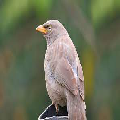

In [21]:
img = image.load_img('/hamgri.jpeg',target_size=(120,120))
img

In [22]:
img = image.img_to_array(img)

In [23]:
img = np.expand_dims(img,axis = 0)

In [24]:
model.predict(img)

1/1 [==============================] - 0s 125ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.9270399e-19, 3.0917613e-10]],
      dtype=float32)

In [25]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 21ms/step


7